In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [114]:
%matplotlib inline

In [115]:
df=pd.read_csv(r'C:\Users\ks123\Downloads\learnbay\machine learning practise\USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [116]:
#we need to predict the house price

In [117]:
df.shape

(5000, 7)

In [118]:
#to find information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4990 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4995 non-null   float64
 3   Avg. Area Number of Bedrooms  4994 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [119]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,4990.0,6.858472e+04,10651.192423,17796.631190,61481.465105,6.879767e+04,7.577915e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,4995.0,6.987693e+00,1.005938,3.236194,6.299156,7.002940e+00,7.665622e+00,1.075959e+01
Avg. Area Number of Bedrooms,4994.0,3.981874e+00,1.234497,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928700,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626584,15938.657920,997577.135075,1.232669e+06,1.471210e+06,2.469066e+06


In [120]:
# There may be some ouliers on this data bcz there is large difference between max value and other value
#scaling is required
#Null values in data

### Data Preperation/Data cleaning

In [121]:
#Check for duplicate rows
df.duplicated().sum()

0

In [122]:
#Missing values

In [123]:
df.isnull().sum()

Avg. Area Income                10
Avg. Area House Age              0
Avg. Area Number of Rooms        5
Avg. Area Number of Bedrooms     6
Area Population                  0
Price                            0
Address                          0
dtype: int64

In [124]:
#Missing value in terms of percentage
df.isnull().sum()/len(df)*100

Avg. Area Income                0.20
Avg. Area House Age             0.00
Avg. Area Number of Rooms       0.10
Avg. Area Number of Bedrooms    0.12
Area Population                 0.00
Price                           0.00
Address                         0.00
dtype: float64

In [125]:
#check for the outlier and then we will decide how to fill null values

<AxesSubplot:ylabel='Avg. Area Income'>

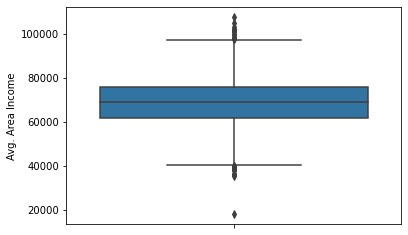

In [126]:
sns.boxplot(y='Avg. Area Income',data=df)

In [127]:
df['Avg. Area Income']=df['Avg. Area Income'].fillna(df['Avg. Area Income'].median())

In [128]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       5
Avg. Area Number of Bedrooms    6
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [129]:
#Avg. Area Number of Rooms 

<AxesSubplot:ylabel='Avg. Area Number of Rooms'>

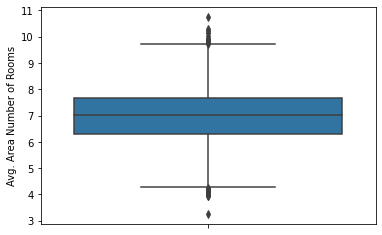

In [130]:
sns.boxplot(y='Avg. Area Number of Rooms',data=df)

In [131]:
df['Avg. Area Number of Rooms']=df['Avg. Area Number of Rooms'].fillna(df['Avg. Area Number of Rooms'].median())

In [132]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    6
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [133]:
#Avg. Area Number of Bedrooms

<AxesSubplot:ylabel='Avg. Area Number of Bedrooms'>

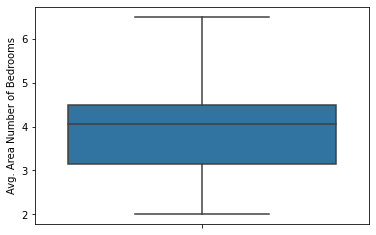

In [134]:
sns.boxplot(y='Avg. Area Number of Bedrooms',data=df)

In [135]:
df['Avg. Area Number of Bedrooms']=df['Avg. Area Number of Bedrooms'].fillna(df['Avg. Area Number of Bedrooms'].median())

In [136]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [137]:
#no null value

In [138]:
df.sample(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
734,76870.35628,5.359764,5.892954,4.32,25655.86712,1.039915e+06,60046 Destiny Port Suite 618\nNorth Nataliehav...
2259,73875.67601,4.934697,6.499534,2.09,34332.42096,9.158185e+05,"332 Cabrera Shoal Apt. 452\nNew John, WI 34660"
1254,89551.73165,5.802162,6.915264,2.14,43964.65845,1.587406e+06,"7561 Best Place\nNew Michaelton, CT 81304-0841"
3757,45862.13138,5.453673,5.128001,2.40,40339.03535,5.763560e+05,USNS Wallace\nFPO AP 94167-1961
4277,61821.94044,5.738638,8.076675,4.29,19123.41954,8.083737e+05,"5464 Freeman Spur\nAnthonyfort, DC 44043"


In [139]:
#Handle address column

In [140]:
df['Address'].nunique()

5000

In [141]:
df['Address'][0]

'208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101'

In [142]:
df['Address'][2]

'9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489'

In [143]:
df['Address'][100]

'124 Russell Mountains Apt. 591\nNorth Sharonfurt, OH 67836-4969'

In [144]:
df['state']=df['Address'].apply(lambda x: x.split(' ')[-2])
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,state
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",NE
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",CA
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",WI
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820,AP
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386,AE


In [145]:
df.drop(columns='Address',inplace=True)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,state
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,NE
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,CA
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,WI
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,AP
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,AE


In [146]:
df['state'].unique()

array(['NE', 'CA', 'WI', 'AP', 'AE', 'KS', 'CO', 'TN', 'AA', 'NM', 'PW',
       'AR', 'HI', 'ME', 'IN', 'MI', 'DE', 'AZ', 'MA', 'MN', 'AL', 'NY',
       'NV', 'VA', 'ID', 'OK', 'NH', 'MO', 'WV', 'WY', 'MH', 'UT', 'SD',
       'CT', 'AK', 'WA', 'RI', 'NJ', 'KY', 'NC', 'IA', 'VT', 'FM', 'ND',
       'LA', 'MP', 'OR', 'TX', 'DC', 'PR', 'MT', 'AS', 'OH', 'MS', 'IL',
       'VI', 'GA', 'PA', 'MD', 'SC', 'GU', 'FL'], dtype=object)

In [147]:
df['state'].value_counts()

AA    177
AP    170
AE    167
GU     91
OR     91
     ... 
KS     67
WI     67
IL     64
MD     62
VI     55
Name: state, Length: 62, dtype: int64

### EDA

C:\Users\ks123\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


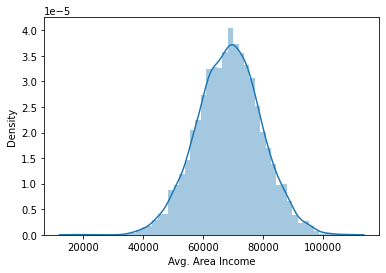

C:\Users\ks123\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


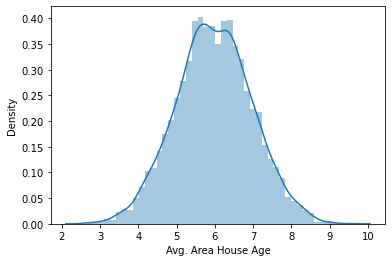

C:\Users\ks123\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


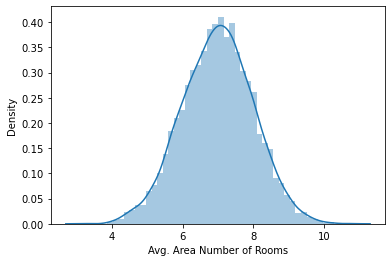

C:\Users\ks123\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


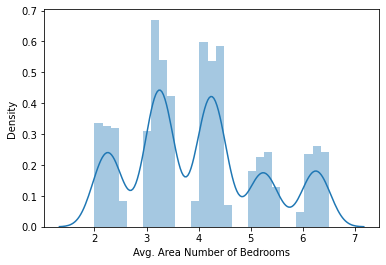

C:\Users\ks123\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


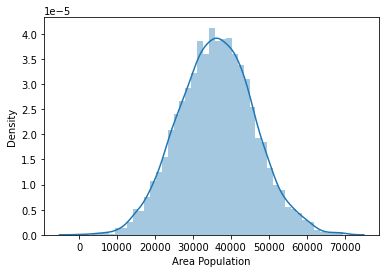

C:\Users\ks123\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


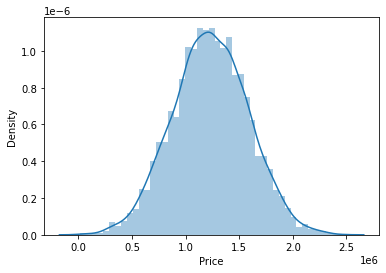

In [148]:
num_col=df.select_dtypes(include=['number']).columns
for i in num_col:
    sns.distplot(df[i])
    plt.show()

In [149]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'state'],
      dtype='object')

In [150]:
for i in num_col:
    print(i,'-------------',df[i].skew())

Avg. Area Income ------------- -0.030196116416445953
Avg. Area House Age ------------- -0.0072138723681024605
Avg. Area Number of Rooms ------------- -0.04123846987381095
Avg. Area Number of Bedrooms ------------- 0.3757299663153947
Area Population ------------- 0.05064968155015881
Price ------------- -0.0027180649317752378


In [151]:
#handling of outlier

In [152]:
filtered_df=df.copy()

In [153]:
filtered_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,state
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,NE
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,CA
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,WI
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,AP
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,AE


<AxesSubplot:>

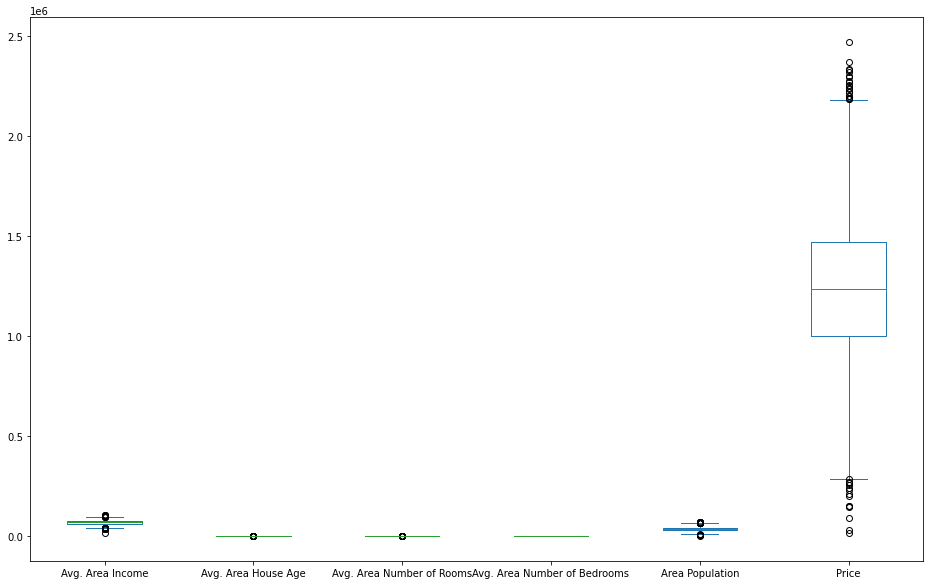

In [154]:
filtered_df.plot(kind='box',figsize=(16,10))

In [155]:
#IQR

In [156]:
q1=np.percentile(filtered_df['Avg. Area Income'],25)
q3=np.percentile(filtered_df['Avg. Area Income'],75)
iqr=q3-q1

#set threshold
lower_threshold=q1-1.5*iqr
upper_threshold=q3-1.5*iqr

print('Lower Threshold',lower_threshold)
print('Upper Threshold',upper_threshold)

Lower Threshold 40063.096827499976
Upper Threshold 54344.465737499995


<AxesSubplot:>

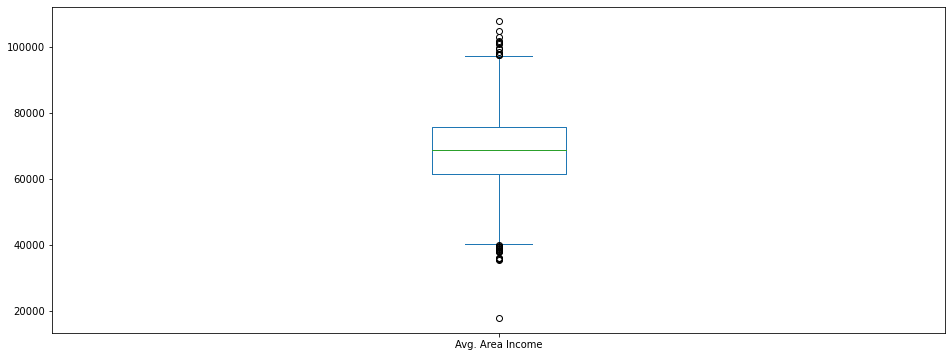

In [46]:
filtered_df['Avg. Area Income'].plot(kind='box', figsize=(16,6))

In [57]:
def outlier_detect(df_col):

    # Calculate Q1, Q3, and IQR
    q1 = np.percentile(df_col, 25, method='midpoint')
    q3 = np.percentile(df_col, 75, method='midpoint')
    iqr = q3 - q1

    # Define the outlier threshold
    lower_threshold = q1 - 1.5 * iqr
    upper_threshold = q3 + 1.5 * iqr

    # Find outliers
    outliers = [x for x in df_col if x < lower_threshold or x > upper_threshold]

    print("Q1:", q1)
    print("Q3:", q3)
    print("IQR:", iqr)
    print("Lower threshold:", lower_threshold)
    print("Upper threshold:", upper_threshold)
    print("Outliers:", outliers)
    print("Total Outliers:", len(outliers))

    # Return lower and upper thresholds
    return lower_threshold, upper_threshold

In [54]:
# Price col

In [182]:
# Call the function and store the thresholds
lower_threshold, upper_threshold = outlier_detect(filtered_df['Price'])

Q1: 1003871.3635
Q3: 1463375.654
IQR: 459504.2905000001
Lower threshold: 314614.9277499998
Upper threshold: 2152632.0897500003
Outliers: []
Total Outliers: 0


In [183]:
filtered_df = filtered_df[(filtered_df['Price'] >= lower_threshold) & (filtered_df['Price'] <= upper_threshold)]

In [164]:
filtered_df.shape

(4959, 7)

In [195]:
# Area Population
# Call the function and store the thresholds
lower_threshold, upper_threshold = outlier_detect(filtered_df['Area Population'])

Q1: 29459.61324
Q3: 42758.055365
IQR: 13298.442125000001
Lower threshold: 9511.950052499997
Upper threshold: 62705.7185525
Outliers: []
Total Outliers: 0


In [194]:
filtered_df = filtered_df[(filtered_df['Area Population'] >= lower_threshold) & (filtered_df['Area Population'] <= upper_threshold)]

In [185]:
# Avg. Area Income
# Call the function and store the thresholds
lower_threshold, upper_threshold = outlier_detect(filtered_df['Avg. Area Income'])

Q1: 61642.662635
Q3: 75633.958255
IQR: 13991.295620000004
Lower threshold: 40655.719204999994
Upper threshold: 96620.90168500002
Outliers: []
Total Outliers: 0


In [173]:
filtered_df = filtered_df[(filtered_df['Avg. Area Income'] >= lower_threshold) & (filtered_df['Avg. Area Income'] <= upper_threshold)]

In [176]:
# Avg. Area House Age
# Call the function and store the thresholds
lower_threshold, upper_threshold = outlier_detect(filtered_df['Avg. Area House Age'])

Q1: 5.333865007
Q3: 6.6456370924999995
IQR: 1.3117720854999995
Lower threshold: 3.366206878750001
Upper threshold: 8.613295220749999
Outliers: []
Total Outliers: 0


In [175]:
filtered_df = filtered_df[(filtered_df['Avg. Area House Age'] >= lower_threshold) & (filtered_df['Avg. Area House Age'] <= upper_threshold)]

<AxesSubplot:>

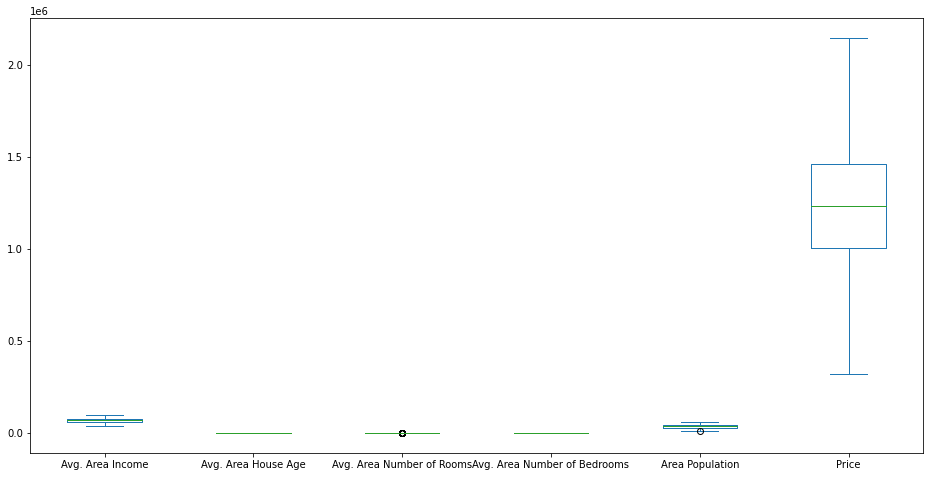

In [191]:
# Avg. Area Number of Rooms
# Call the function and store the thresholds
lower_threshold, upper_threshold = outlier_detect(filtered_df['Avg. Area Number of Rooms'])

Q1: 6.307115294
Q3: 7.6587747964999995
IQR: 1.3516595024999996
Lower threshold: 4.279626040250001
Upper threshold: 9.68626405025
Outliers: []
Total Outliers: 0


In [190]:
filtered_df = filtered_df[(filtered_df['Avg. Area Number of Rooms'] >= lower_threshold) & (filtered_df['Avg. Area Number of Rooms'] <= upper_threshold)]

<AxesSubplot:>

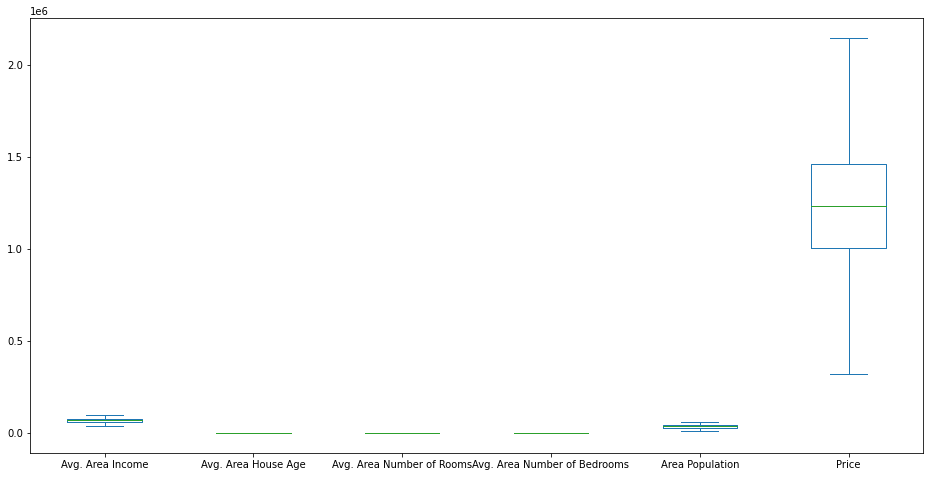

In [196]:
filtered_df.plot(kind='box', figsize=(16, 8))

In [197]:
filtered_df.shape

(4835, 7)

In [198]:
5000-4835

165

In [199]:
# Importance of each Col check

In [200]:
state_avg_price = filtered_df.groupby('state')['Price'].mean()

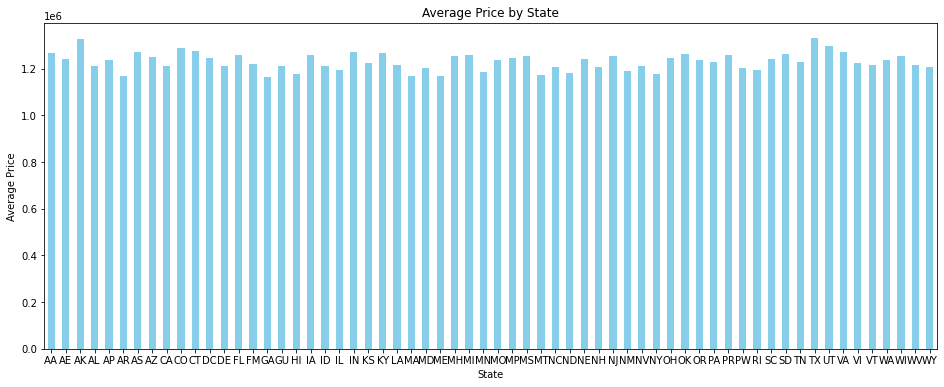

In [201]:
# Plotting
plt.figure(figsize=(16, 6))
state_avg_price.plot(kind='bar', color='skyblue')
plt.title('Average Price by State')
plt.xlabel('State')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

In [202]:
correlation = filtered_df.corr()['Price'].sort_values(ascending=False)
print(correlation)

Price                           1.000000
Avg. Area Income                0.624150
Avg. Area House Age             0.440281
Area Population                 0.406521
Avg. Area Number of Rooms       0.324243
Avg. Area Number of Bedrooms    0.166722
Name: Price, dtype: float64


### A common rule of thumb is to consider a correlation coefficient (such as the Pearson correlation coefficient) of around 0.7 or higher to be a strong correlation.

In [203]:
# we can drop Avg. Area Number of Bedrooms--lowest corelation

In [207]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le=LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in filtered_df.columns:
    # Compare if the dtype is object
    if filtered_df[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        filtered_df[col]=le.fit_transform(filtered_df[col])

In [209]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [210]:
filtered_df['state'] = label_encoder.fit_transform(filtered_df['state'])

In [211]:
filtered_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,state
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,37
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,8
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,59
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,4
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,1


In [212]:
# Calculate correlation coefficient
correlation =filtered_df['state'].corr(filtered_df['Price'])

print(f"Correlation coefficient: {correlation}")

Correlation coefficient: -0.004243189618318941


In [213]:
# Now we can say it is not much corelated so we can drop this column

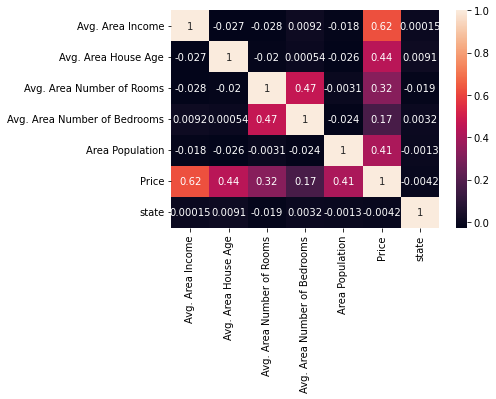

In [214]:
# Heatmap
sns.heatmap(filtered_df.corr(), annot=True)
plt.show()

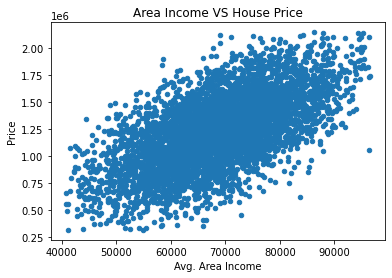

In [215]:
# Plotting to check the relation with target
filtered_df.plot.scatter(x='Avg. Area Income', y='Price', title='Area Income VS House Price')
plt.show()

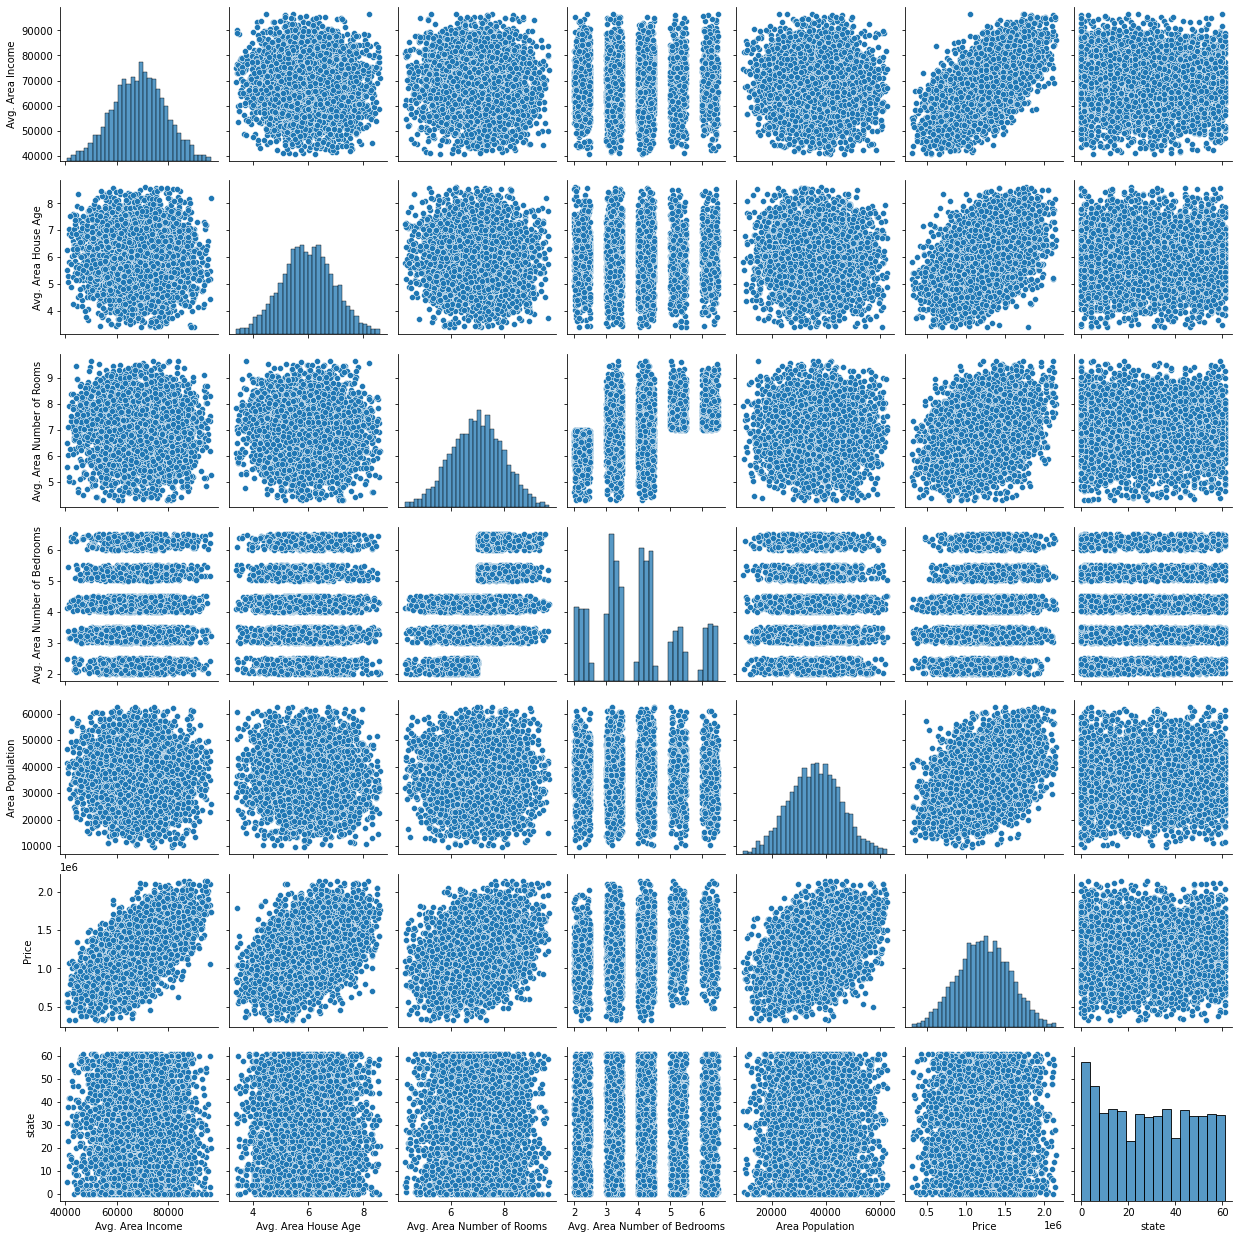

In [216]:
# to check relation between input and with target. We can also check multi collinearity
sns.pairplot(filtered_df)

In [217]:
# Seprate the input and target

In [218]:
x=filtered_df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Area Population']]

In [219]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,79545.45857,5.682861,7.009188,23086.80050
1,79248.64245,6.002900,6.730821,40173.07217
2,61287.06718,5.865890,8.512727,36882.15940
3,63345.24005,7.188236,5.586729,34310.24283
4,59982.19723,5.040555,7.839388,26354.10947


In [220]:
y=filtered_df['Price']

In [221]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 4835, dtype: float64

In [222]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,79545.45857,5.682861,7.009188,23086.80050
1,79248.64245,6.002900,6.730821,40173.07217
2,61287.06718,5.865890,8.512727,36882.15940
3,63345.24005,7.188236,5.586729,34310.24283
4,59982.19723,5.040555,7.839388,26354.10947


In [223]:
# Feature Scalling

In [224]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3
0,1.073159,-0.308595,0.023362,-1.354987
1,1.043999,0.023526,-0.260359,0.421691
2,-0.720604,-0.118656,1.555820,0.079492
3,-0.518402,1.253612,-1.426457,-0.187942
4,-0.848799,-0.975150,0.869529,-1.015243
...,...,...,...,...
4830,-0.791253,1.919980,-0.865239,-1.380924
4831,0.969593,1.057372,-0.417381,-1.091982
4832,-0.513938,1.318321,-2.223138,-0.296511
4833,-0.060973,-0.462673,0.146644,0.676713


In [225]:
## VIF - Variance Inflation Factor - to check multicollinearity

In [226]:
variable = sc_x
variable.shape

(4835, 4)

In [227]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = sc_x

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i ) for i in range(variable.shape[1])]

vif['Features'] = x.columns

In [228]:
![vif.png](attachment:vif.png)

'[vif.png]' is not recognized as an internal or external command,
operable program or batch file.


In [229]:
# Train Test Split

In [230]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(sc_x, y, test_size=0.20, random_state=101)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3868, 4) (967, 4) (3868,) (967,)


In [231]:
# Model Building
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [232]:
print(lm.intercept_)
print()
print(lm.coef_)

1233222.677300517

[217462.5679853  160363.95752829 119576.66615242 144608.10512614]


In [233]:
# Predict house price by using lm model with test dataset

y_pred_price = lm.predict(x_test)
y_pred_price_train = lm.predict(x_train)

In [234]:
y_pred_price

array([ 793764.581681  ,  669757.78007733, 1587765.46962888,
       1208767.52289058, 1662788.4143395 , 1221789.75129147,
       1085882.09411964, 1721577.88781074, 1314085.64682397,
       1123185.87728514, 1392512.33124163, 1285837.63232485,
        607641.80724963, 1312771.27039023, 1393433.56283621,
       1216603.95872185, 1283168.22907729, 1029481.70108241,
        789680.4739473 ,  830429.82803911, 1309449.05616384,
       1388348.04461605, 1516235.36821777, 1668199.81460122,
        851824.66694543,  546527.13954732, 1991227.26602868,
       1437421.06756023, 1497185.80347467, 1314389.07757799,
       1207850.801069  , 1418303.07897068, 1362146.84337245,
       1514820.83346787, 1507483.65368935,  944192.16220915,
       1214167.46554309, 1213290.67623005, 1026471.82965552,
        829787.87551775, 1452725.14155244, 1662147.31709189,
        931489.72129712, 1496968.39365515, 1310744.23906222,
        898500.47654708,  778521.08319303, 1299759.33780476,
       1176690.03998571,

In [235]:
y_test

219     9.018817e+05
157     7.348275e+05
2939    1.603046e+06
670     1.144478e+06
2479    1.624138e+06
            ...     
3567    6.260202e+05
3367    8.525046e+05
18      1.019426e+06
4338    1.565152e+06
3447    1.336172e+06
Name: Price, Length: 967, dtype: float64

In [236]:
# Checking Performance

In [237]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [238]:
x_train.shape[0]

3868

In [239]:
# Calculate metrics
# MAE for test and train data
train_mae = mean_absolute_error(y_train, y_pred_price_train)
test_mae = mean_absolute_error(y_test, y_pred_price)

# MSE for test and train data
train_mse = mean_squared_error(y_train, y_pred_price_train)
test_mse = mean_squared_error(y_test, y_pred_price)

# RMSE
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# R2 score
train_r2 = r2_score(y_train, y_pred_price_train)
test_r2 = r2_score(y_test, y_pred_price)


# Adjusted R-squared
n = x_train.shape[0]
k = x_train.shape[1]
adj_r2 = 1 - (1 - train_r2) * (n - 1) / (n - k - 1)


# Print metrics
print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print()
print("Training R-squared (R2) score:", train_r2)
print("Testing R-squared (R2) score:", test_r2)

print("Adjusted R-squared score:", adj_r2)


Training MAE: 81241.16798335679
Testing MAE: 81943.31498222657
Training MSE: 10290762010.105728
Testing MSE: 10395203245.439688
Training RMSE: 101443.3931318631
Testing RMSE: 101956.86953530737

Training R-squared (R2) score: 0.9079435917759355
Testing R-squared (R2) score: 0.9080122237558957
Adjusted R-squared score: 0.9078482706180541


In [240]:
## See R2 and adj R2

In [241]:
# Method 2 OLS Stat Model

In [242]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as sm

In [243]:
reg_model = sm.OLS(endog = y_train, exog=x_train).fit()

In [244]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.065
Model:                            OLS   Adj. R-squared (uncentered):              0.064
Method:                 Least Squares   F-statistic:                              67.22
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                    4.54e-55
Time:                        00:40:16   Log-Likelihood:                         -59751.
No. Observations:                3868   AIC:                                  1.195e+05
Df Residuals:                    3864   BIC:                                  1.195e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.225e+05   1.99e+04     11.179      0.000    1.83e+05    2.62e+05
x2          1.596e+05   1.99e+04      7.999      0.000     1.2e+05    1.99e+05
x3          1.259e+05   2.01e+04      6.278      0.000    8.66e+04    1.65e+05
x4          1.509e+05   1.99e+04      7.597      0.000    1.12e+05     1.9e+05
==============================================================================
Omnibus:                        4.211   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                4.626
Skew:                           0.008   Prob(JB):                       0.0989
Kurtosis:                       3.169   Cond. No.                         1.05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""